In [1]:
#datased used: https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import darafream
df = pd.read_csv("ufc-fighters-statistics.csv")

In [4]:
#dataset info

In [5]:
print(df.head())

                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                            

In [6]:
df.shape

(4111, 18)

In [7]:
#data types in dataset
df.dtypes

name                                             object
nickname                                         object
wins                                              int64
losses                                            int64
draws                                             int64
height_cm                                       float64
weight_in_kg                                    float64
reach_in_cm                                     float64
stance                                           object
date_of_birth                                    object
significant_strikes_landed_per_minute           float64
significant_striking_accuracy                   float64
significant_strikes_absorbed_per_minute         float64
significant_strike_defence                      float64
average_takedowns_landed_per_15_minutes         float64
takedown_accuracy                               float64
takedown_defense                                float64
average_submissions_attempted_per_15_minutes    

In [8]:
#check which columns have missing values 
print(df.loc[:,df.isnull().sum(axis=0)>=1])

        nickname  height_cm  weight_in_kg  reach_in_cm    stance date_of_birth
0            NaN     190.50         92.99          NaN  Orthodox    1981-10-05
1     The Animal     185.42         83.91          NaN       NaN           NaN
2            NaN     177.80         97.98          NaN       NaN           NaN
3            NaN     167.64         61.23          NaN       NaN           NaN
4         All In     190.50         83.91       193.04  Orthodox    1994-09-29
...          ...        ...           ...          ...       ...           ...
4106         NaN     175.26        106.59          NaN  Orthodox           NaN
4107         NaN     172.72         70.31          NaN  Orthodox    1967-03-22
4108         NaN     180.34         77.11          NaN  Orthodox           NaN
4109       Money     190.50         83.91       210.82  Southpaw    1996-10-14
4110        PITA     162.56         52.16       162.56  Southpaw    1988-06-27

[4111 rows x 6 columns]


In [9]:
nan_counts = df.isna().sum() 

In [10]:
total_cells = df.shape[0]  # Total number of cells in a column
nan_percentage = (nan_counts / total_cells) * 100
nan_df = pd.DataFrame({'Column' : df.columns,  'NaN Count': nan_counts, 'NaN Percentage': nan_percentage})
print(nan_df)

                                                                                    Column  \
name                                                                                  name   
nickname                                                                          nickname   
wins                                                                                  wins   
losses                                                                              losses   
draws                                                                                draws   
height_cm                                                                        height_cm   
weight_in_kg                                                                  weight_in_kg   
reach_in_cm                                                                    reach_in_cm   
stance                                                                              stance   
date_of_birth                                               

In [11]:
filtered_nan_df=nan_df[nan_df['NaN Count'] > 0]
print(filtered_nan_df)

                      Column  NaN Count  NaN Percentage
nickname            nickname       1854       45.098516
height_cm          height_cm        298        7.248845
weight_in_kg    weight_in_kg         87        2.116273
reach_in_cm      reach_in_cm       1927       46.874240
stance                stance        823       20.019460
date_of_birth  date_of_birth       1135       27.608854


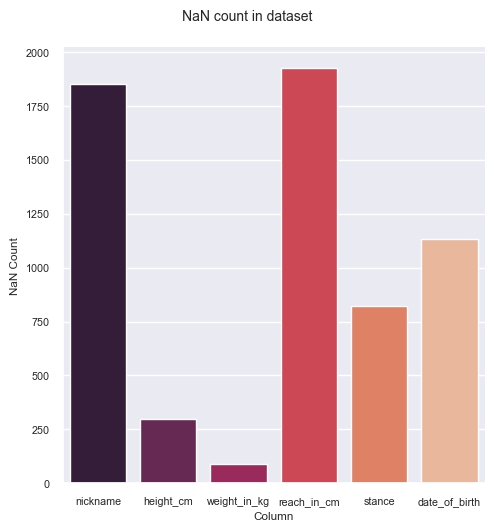

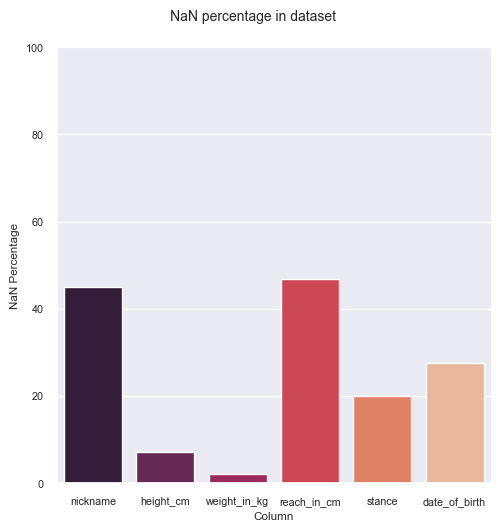

In [12]:
#1st bar plot for count of missing data, 2nd for percentage
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=0.70)
nan_plot_1 = sns.catplot(data = filtered_nan_df ,x='Column', hue='Column', legend= False , y='NaN Count' , palette="rocket", kind='bar')
nan_plot_1.fig.suptitle('NaN count in dataset' , y=1.05)
plt.show()
nan_plot_2 = sns.catplot(data = filtered_nan_df ,x='Column', hue='Column', legend= False , y='NaN Percentage' , palette="rocket", kind='bar')
nan_plot_2.fig.suptitle('NaN percentage in dataset' , y=1.05)
plt.ylim(0,100)
plt.show()

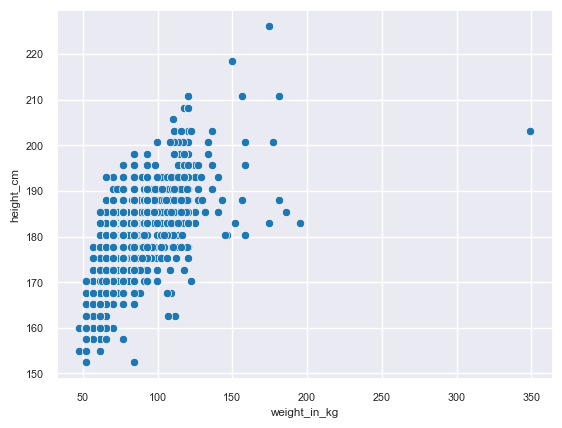

In [13]:
sns.set_context(font_scale=1)
sns.scatterplot(x='weight_in_kg', y='height_cm' , data=df)
plt.show()

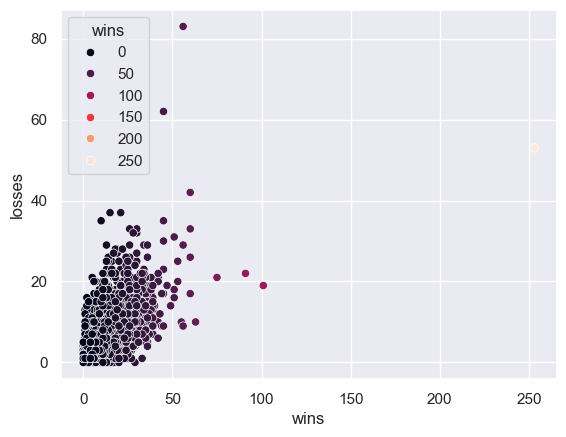

In [14]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1)
sns.scatterplot(data = df ,x='wins',hue='wins', y='losses' , palette="rocket")
plt.show()

In [15]:
#looking for a guy with most registered wins
df.sort_values('wins' , ascending = False).head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
3969,Travis Fulton,The Ironman,253,53,10,182.88,108.86,NaN,Orthodox,1977-05-29,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
2420,Dan Severn,The Beast,101,19,1,187.96,113.40,NaN,Southpaw,1958-06-08,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
675,Jeremy Horn,Gumby,91,22,5,185.42,83.91,187.96,Orthodox,1975-08-25,1.19,39.0,1.99,55.0,1.83,38.0,29.0,1.1
599,Travis Wiuff,The Diesel,75,21,0,190.50,92.99,NaN,Orthodox,1978-03-15,0.48,30.0,4.03,41.0,4.84,57.0,44.0,1.2
3740,Luis Santos,NaN,63,10,1,185.42,77.11,NaN,Southpaw,NaN,4.40,57.0,4.00,64.0,0.00,0.0,0.0,0.0


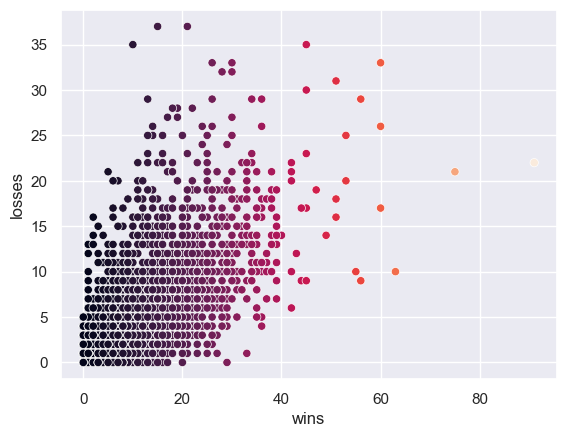

In [16]:
#there are only 2 figters with more then 100 wins and only 4 fighters with more then 40 losses
#on this scatter plot we will zoom in on more realistic data
df_body = df[df['wins'].between(0,100) & df['losses'].between(0,40)]

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1)

sns.scatterplot(data = df_body ,x='wins',hue='wins', legend = False, y='losses' , palette="rocket")
plt.show()

In [17]:
#looking for the haviest fighter
df.sort_values('weight_in_kg' , ascending = False).head(1)

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
4069,Emmanuel Yarborough,NaN,1,2,0,203.2,349.27,NaN,Open Stance,1960-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Axes(0.125,0.11;0.62x0.77)


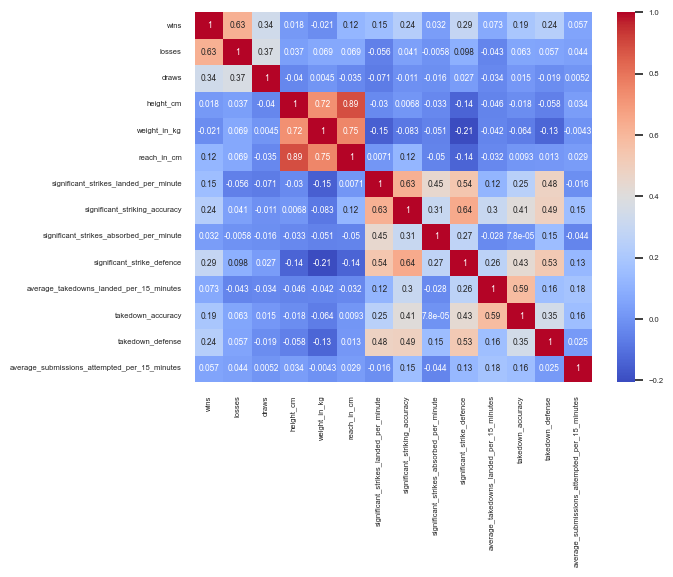

In [18]:
#Looking for correlations
sns.set_context("notebook", font_scale=0.5)
map1 = sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, cmap="coolwarm")
print(map1)
#It is easy to see that wins and losses are correlated. 
#Physical attributes are also highly correlated. 
#An interesting thing is that significant strike defense is negatively correlated with weight. 

In [19]:
#I want to look for correlations between physical attributes and W/L ratio. 
#I will only use valid entries in the dataset, so I need to clean it.
# Select only rows where wins, losses, height, weight,stance, and reach have valid (non-null) values
# Drop all unused collumns
df_physical = df.dropna(subset=['wins', 'losses', 'height_cm', 'weight_in_kg', 'reach_in_cm','stance'])
df_physical = df_physical.drop(columns=list(df_physical.columns[9:]) + ['nickname','draws'])

#add new information
df_physical["win-ratio"] = df_physical["wins"]/(df_physical["wins"] + df_physical["losses"])
df_physical["height-weight"] = df_physical["height_cm"]/df_physical["weight_in_kg"]
df_physical["height-reach"] = df_physical["height_cm"]/df_physical["reach_in_cm"]
df_physical["reach-weight"] = df_physical["reach_in_cm"]/df_physical["weight_in_kg"]

# Display the cleaned dataset
df_physical

,name,wins,losses,height_cm,weight_in_kg,reach_in_cm,stance,win-ratio,height-weight,height-reach,reach-weight
4,Collin Huckbody,8,2,190.50,83.91,193.04,Orthodox,0.800000,2.270290,0.986842,2.300560
8,Will Kerr,9,3,177.80,70.31,175.26,Orthodox,0.750000,2.528801,1.014493,2.492675
11,Bo Nickal,5,0,185.42,83.91,193.04,Southpaw,1.000000,2.209749,0.960526,2.300560
17,Westin Wilson,16,8,185.42,65.77,185.42,Southpaw,0.666667,2.819218,1.000000,2.819218
22,Dione Barbosa,6,2,167.64,56.70,167.64,Orthodox,0.750000,2.956614,1.000000,2.956614
...,...,...,...,...,...,...,...,...,...,...,...
4096,Eperaim Ginting,6,1,162.56,61.23,162.56,Orthodox,0.857143,2.654908,1.000000,2.654908
4099,Jamelle Jones,7,5,182.88,92.99,190.50,Orthodox,0.583333,1.966663,0.960000,2.048607
4102,Ariel Beck,4,5,167.64,56.70,167.64,Southpaw,0.444444,2.956614,1.000000,2.956614
4109,Matej Penaz,6,1,190.50,83.91,210.82,Southpaw,0.857143,2.270290,0.903614,2.512454


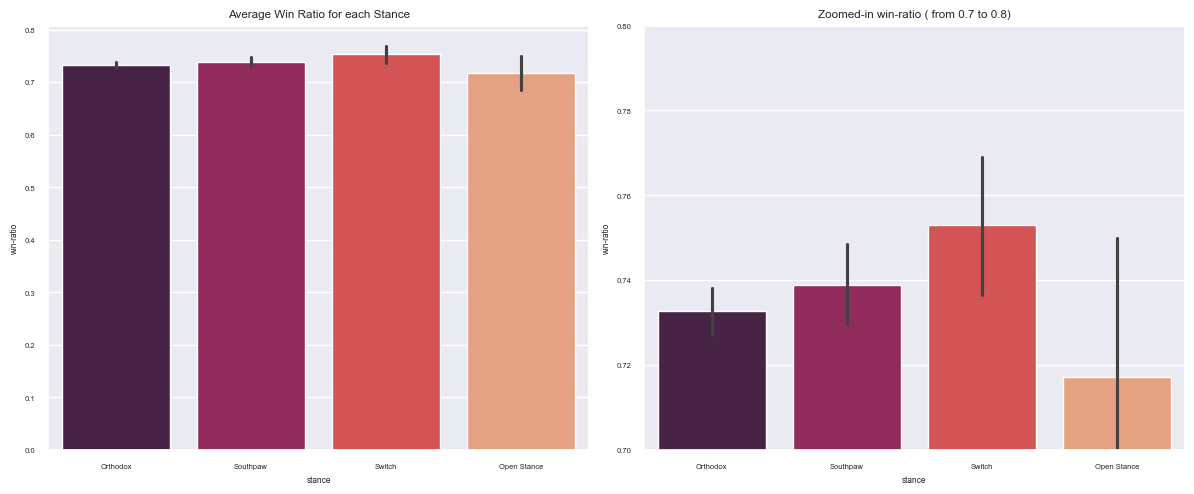

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#analysis of count of fighters stances 
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=0.70)
sns.barplot(data = df_physical ,x='stance', hue='stance', legend= False , y='win-ratio' , palette="rocket", ax=axes[0])
axes[0].set_title("Average Win Ratio for each Stance")

#zooming in on win-count form 0.7 to 0.8
sns.set_context("notebook", font_scale=0.70)
sns.barplot(data = df_physical ,x='stance', hue='stance', legend= False , y='win-ratio' , palette="rocket", ax=axes[1])
axes[1].set_ylim(0.7 , 0.8)
axes[1].set_title("Zoomed-in win-ratio ( from 0.7 to 0.8)")

plt.tight_layout()
plt.show()

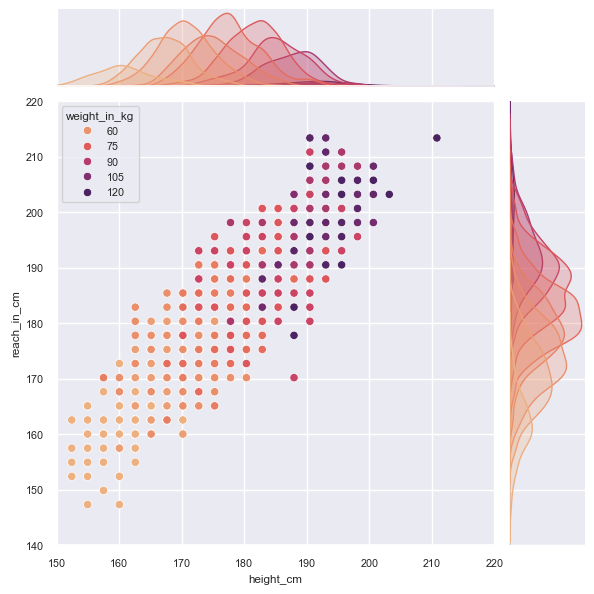

In [21]:
#analysis of relations beetwenn height, reach and weight

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=0.70)
#sns.jointplot(data=df_physical , x='height_cm', y='reach_in_cm' ,hue='reach_in_cm', palette="rocket")
#sns.jointplot(data=df_physical , x='height_cm', y='reach_in_cm' ,hue='height_cm', palette="rocket")
sns.jointplot(data=df_physical , x='height_cm', y='reach_in_cm' ,hue='weight_in_kg', 
              palette="flare", kind="scatter",xlim=(150, 220), ylim=(140, 220))
plt.show()

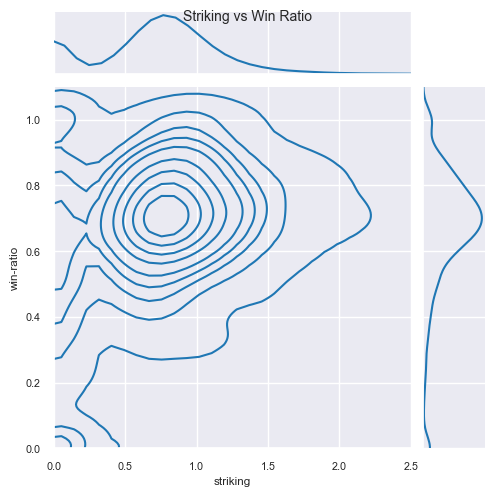

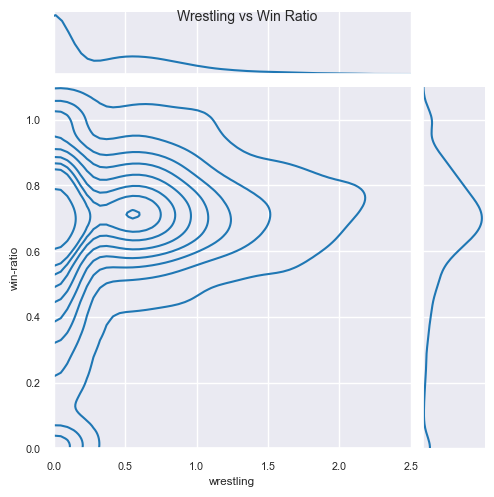

In [52]:
#now i will look for relations beetwen striking accuracy/defence and win rate
#add striking collumn that will be significant_striking_accuracy / significant_strike_defence
df["win-ratio"] = df["wins"]/(df["wins"] + df["losses"])
df["striking"] =np.where(df['significant_strike_defence'] != 0,
                         df['significant_striking_accuracy']/df['significant_strike_defence'],
                         0)
#now i will look for relations beetwen wrestling takedown_accuracy/takedown_defense and win rate
#add wrestling collumn that will be takedown_accuracy/takedown_defense

df["wrestling"] =np.where(df['takedown_defense'] != 0,
                         df['takedown_accuracy']/df['takedown_defense'],
                         0)

g1 = sns.jointplot(data=df, x='striking', y='win-ratio', kind='kde', xlim=(0, 2.5), ylim=(0,1.1) , height=5)
g1.fig.suptitle("Striking vs Win Ratio")

g2 = sns.jointplot(data=df, x='wrestling', y='win-ratio', kind='kde', xlim=(0, 2.5),ylim=(0,1.1) , height=5)
g2.fig.suptitle("Wrestling vs Win Ratio")

plt.show()